In [15]:
import pandas as pd
import numpy as np

In [16]:
# df = pd.read_csv('./extended_data.csv')
df = pd.read_csv('../new_x_臺中/full_with_new_x.csv')
display(df)

,Date,雞蛋價格,鴨蛋價格,平均氣溫,最高氣溫,降雨量,入中雞雛數,可產蛋雞隻數_5,日均產蛋箱數_1,日均產蛋箱數_6,...,目前換羽隻數,白雞數量,紅雞數量_1,進口雞數量_2,進口雞數量_4,玉米粒價格_6,黃豆粉價格_2,玉米粉價格_6,脫殼豆粉價格_6,高蛋白豆粉價格_2
0,2018-07-01,27.5,32.0,28.6,35.4,13.0,1548978.0,29964849.0,107109.0,114908.0,...,687628.0,372700,32600.0,0.0,15200.0,6.10,13.9,6.65,13.3,14.76
1,2018-07-02,27.5,32.0,28.6,35.4,67.5,1548978.0,29964849.0,107109.0,114908.0,...,687628.0,372700,32600.0,0.0,15200.0,6.10,13.9,6.65,13.3,14.73
2,2018-07-03,27.5,32.0,28.6,35.4,46.0,1548978.0,29964849.0,107109.0,114908.0,...,687628.0,372700,32600.0,0.0,15200.0,6.10,13.9,6.63,13.3,14.78
3,2018-07-04,27.5,34.0,28.6,35.4,31.0,1548978.0,29964849.0,107109.0,114908.0,...,687628.0,372700,32600.0,0.0,15200.0,6.10,13.9,6.63,13.3,14.78
4,2018-07-05,27.5,34.0,28.6,35.4,13.0,1548978.0,29964849.0,107109.0,114908.0,...,687628.0,372700,32600.0,0.0,15200.0,6.10,13.7,6.63,13.3,14.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,2022-12-27,40.5,43.0,17.8,28.1,0.0,1592549.0,32759636.0,120668.0,119905.0,...,990135.0,387890,76937.0,38640.0,0.0,12.35,19.3,13.01,23.6,20.45
1641,2022-12-28,40.5,43.0,17.8,28.1,0.0,1592549.0,32759636.0,120668.0,116311.0,...,990135.0,387890,76937.0,38640.0,0.0,12.30,19.5,12.98,18.7,20.50
1642,2022-12-29,40.5,43.0,17.8,28.1,0.0,1592549.0,33421215.0,120668.0,116311.0,...,990135.0,353700,76937.0,38640.0,0.0,12.30,19.5,12.98,18.7,20.60
1643,2022-12-30,40.5,43.0,17.8,28.1,0.0,1592549.0,33421215.0,120668.0,116311.0,...,990135.0,353700,76937.0,38640.0,22080.0,12.20,19.5,12.93,18.7,20.50


In [17]:
df.columns

Index(['Date', '雞蛋價格', '鴨蛋價格', '平均氣溫', '最高氣溫', '降雨量', '入中雞雛數', '可產蛋雞隻數_5',
       '日均產蛋箱數_1', '日均產蛋箱數_6', '淘汰雞隻數量_2', '目前換羽隻數', '白雞數量', '紅雞數量_1',
       '進口雞數量_2', '進口雞數量_4', '玉米粒價格_6', '黃豆粉價格_2', '玉米粉價格_6', '脫殼豆粉價格_6',
       '高蛋白豆粉價格_2'],
      dtype='object')

## Data preprocessing

In [18]:
print(df.isnull().sum())

Date         0
雞蛋價格         0
鴨蛋價格         0
平均氣溫         0
最高氣溫         0
降雨量          0
入中雞雛數        0
可產蛋雞隻數_5     0
日均產蛋箱數_1     0
日均產蛋箱數_6     0
淘汰雞隻數量_2     0
目前換羽隻數       0
白雞數量         0
紅雞數量_1       0
進口雞數量_2      0
進口雞數量_4      0
玉米粒價格_6      0
黃豆粉價格_2      0
玉米粉價格_6      0
脫殼豆粉價格_6     0
高蛋白豆粉價格_2    0
dtype: int64


In [19]:
import pandas as pd

# df.set_index('Date', inplace=True)
# 創建一個日期範圍，從2018年7月1日開始，直到原本的DataFrame的長度
start_date = '2018-07-01'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=len(df) - 1)
new_index = pd.date_range(start=start_date, end=end_date)

# 將新索引設置為DataFrame的索引
df.index = new_index

In [20]:
time_unit = 'day'

if time_unit == 'week':
    df = df.resample('W').mean()
    df = df.dropna()
    display(df)
else:
    df = df.drop(columns=['Date'])
    display(df)

,雞蛋價格,鴨蛋價格,平均氣溫,最高氣溫,降雨量,入中雞雛數,可產蛋雞隻數_5,日均產蛋箱數_1,日均產蛋箱數_6,淘汰雞隻數量_2,目前換羽隻數,白雞數量,紅雞數量_1,進口雞數量_2,進口雞數量_4,玉米粒價格_6,黃豆粉價格_2,玉米粉價格_6,脫殼豆粉價格_6,高蛋白豆粉價格_2
2018-07-01,27.5,32.0,28.6,35.4,13.0,1548978.0,29964849.0,107109.0,114908.0,944287.0,687628.0,372700,32600.0,0.0,15200.0,6.10,13.9,6.65,13.3,14.76
2018-07-02,27.5,32.0,28.6,35.4,67.5,1548978.0,29964849.0,107109.0,114908.0,944287.0,687628.0,372700,32600.0,0.0,15200.0,6.10,13.9,6.65,13.3,14.73
2018-07-03,27.5,32.0,28.6,35.4,46.0,1548978.0,29964849.0,107109.0,114908.0,944287.0,687628.0,372700,32600.0,0.0,15200.0,6.10,13.9,6.63,13.3,14.78
2018-07-04,27.5,34.0,28.6,35.4,31.0,1548978.0,29964849.0,107109.0,114908.0,944287.0,687628.0,372700,32600.0,0.0,15200.0,6.10,13.9,6.63,13.3,14.78
2018-07-05,27.5,34.0,28.6,35.4,13.0,1548978.0,29964849.0,107109.0,114908.0,944287.0,687628.0,372700,32600.0,0.0,15200.0,6.10,13.7,6.63,13.3,14.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,40.5,43.0,17.8,28.1,0.0,1592549.0,32759636.0,120668.0,119905.0,1216618.0,990135.0,387890,76937.0,38640.0,0.0,12.35,19.3,13.01,23.6,20.45
2022-12-28,40.5,43.0,17.8,28.1,0.0,1592549.0,32759636.0,120668.0,116311.0,1216618.0,990135.0,387890,76937.0,38640.0,0.0,12.30,19.5,12.98,18.7,20.50
2022-12-29,40.5,43.0,17.8,28.1,0.0,1592549.0,33421215.0,120668.0,116311.0,1216618.0,990135.0,353700,76937.0,38640.0,0.0,12.30,19.5,12.98,18.7,20.60
2022-12-30,40.5,43.0,17.8,28.1,0.0,1592549.0,33421215.0,120668.0,116311.0,1216618.0,990135.0,353700,76937.0,38640.0,22080.0,12.20,19.5,12.93,18.7,20.50


## Model

In [21]:
y_variable = '雞蛋價格'
x_variables = df.columns.difference([y_variable])

X = df[x_variables]
y = df[y_variable]

In [22]:
# 選擇20xx年作為測試集
start_date = '2022-01-01'
end_date = '2022-12-31'
test_set = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# 將測試集之外的部分作為訓練集
train_set = df.loc[(df.index < start_date)]

# 分割資料
X_train, y_train = train_set[x_variables], train_set[y_variable]
X_test, y_test = test_set[x_variables], test_set[y_variable]


In [23]:
# 搜尋最佳參數
from pmdarima import auto_arima
best_model = auto_arima(y_train, exogenous=X_train, seasonal=True, suppress_warnings=True)
order = best_model.get_params()['order']
seasonal_order = best_model.get_params()['seasonal_order']
print(order)
print(seasonal_order)

(2, 1, 5)
(0, 0, 0, 0)


In [24]:
print(y_test.shape)

(365,)


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
way = 'rolling'
step_num = 5

if way == 'normal':
    # SARIMA模型
    SARIMAXmodel = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model = SARIMAXmodel.fit()

    # 預測
    predictions = model.get_forecast(steps=len(y_test), exog=X_test, index=y_test.index)

else:
    # 初始化window
    window_size = len(y_train)
    history_window = y_train[-window_size:]

    # 預測結果列表
    predictions = []

    # 滾動預測循環
    for i in range(0, len(test_set), step_num):
        # 使用 SARIMA 模型进行单步预测
        model = SARIMAX(history_window, exog=X_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        model = model.fit(disp=False)
        prediction = model.forecast(steps=step_num, exog=X_test.iloc[i:i+step_num])

        # 將新的預測值添加到結果列表
        predictions.extend(prediction)
        
        # # 更新歷史window（增加新觀測值，移除最早的觀測值）
        history_window = history_window[step_num:]
        history_window = np.append(history_window, prediction)
        
        # 將真實的資料添加到history_window中，而不是預測值
        # true_values = y_test.iloc[i:i+step_num]
        # history_window = history_window[step_num:]
        # history_window = np.append(history_window, true_values)

    # 將predictions的索引改成和y_test一樣
    predictions = pd.Series(predictions, index=y_test.index)

/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

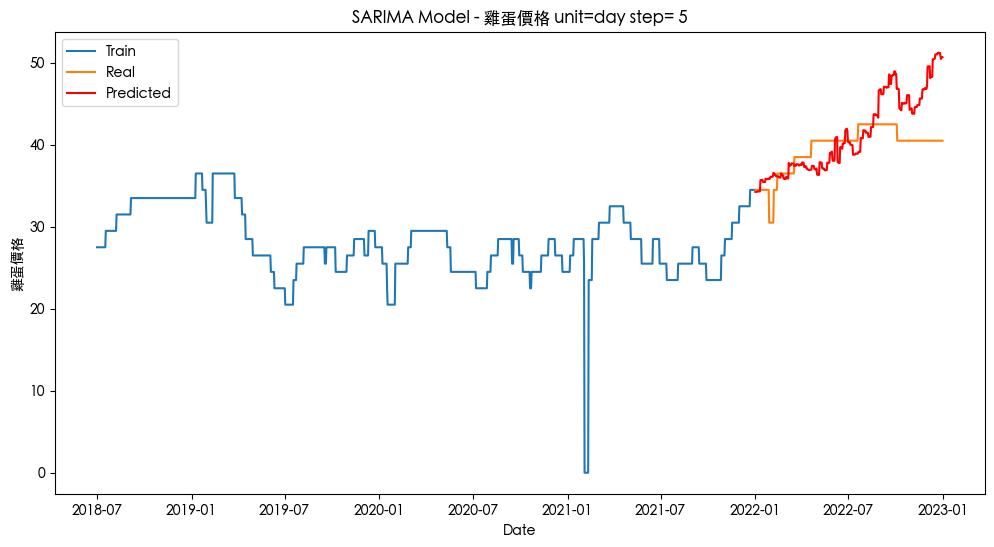

In [26]:
if way == 'normal':
    y_pred = predictions.predicted_mean
else:
    y_pred = predictions

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predicted', color='red')

plt.title(f'SARIMA Model - {y_variable} unit={time_unit} step= {step_num}')
plt.xlabel('Date')
plt.ylabel(y_variable)
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

mspe = np.mean(((y_pred - y_test) / y_test) ** 2)
print(f'MSPE: {mspe}')


RMSE: 4.122842068350062
MSE: 16.997826720557015
MSPE: 0.010611933831787157


In [28]:
# 查看模型的参数
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1280
Model:               SARIMAX(2, 1, 5)   Log Likelihood               -1954.658
Date:                Wed, 13 Dec 2023   AIC                           3963.315
Time:                        17:11:16   BIC                           4102.342
Sample:                    07-01-2018   HQIC                          4015.533
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
入中雞雛數       -3.56e-07   3.43e-06     -0.104      0.917   -7.08e-06    6.37e-06
可產蛋雞隻數_5    1.954e-07   1.93e-07      1.012      0.312   -1.83e-07    5.74e-07
平均氣溫          -0.0683      0.438     -0.156      0.8